# Project: Investigate a Dataset of TMDB Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
this dataset consists of more than 10000 movies and their budget, revenue, genres, cast...
we will analyis this dataset to inspect the variables thet affect on the revenue of movies.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load dataset 
df = pd.read_csv('tmdb-movies.csv')
# display first 5 rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [22]:
# display last 5 rows
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [23]:
# inspect data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [25]:
# inspect number of unique values of each variable
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [26]:
# display general statistics of numeric variables
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


###### there are more than 50% of data with budget and revenue zeroes, so we will check number of zeroes

In [27]:
# check number of budget zeroes
print(df[df['budget'] == 0].id.count())

5696


In [28]:
# check number of revenue zeroes
print(df[df['revenue'] == 0].id.count())

6016


###### - drop imdb_id, homepage,  overview 
###### - convert release_date from object to date type
###### - convert release_year from object to category
###### - convert id from int to object
###### - drop rows where budget or revenue equal zero

## Data Cleaning

In [3]:
# copy the original data to another dataframe before proceesing it
df_copy = df.copy()
df_copy.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### drop imdb_id, homepage,  overview 

In [4]:
df_copy.drop(columns=['imdb_id', 'homepage',  'overview'], inplace=True)

#### convert release_date from object to date type

In [5]:
df_copy.release_date = pd.to_datetime(df_copy.release_date)
df_copy.release_date.dtype

dtype('<M8[ns]')

#### convert release_year from int to category

In [6]:
df_copy['release_year'] = df_copy['release_year'].astype('category')
df_copy['release_year'].dtype

CategoricalDtype(categories=[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
                  1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
                  1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
                  1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
                  2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
                  2010, 2011, 2012, 2013, 2014, 2015],
                 ordered=False)

#### convert id from int to object

In [7]:
df_copy['id'] = df_copy['id'].astype('object')
df_copy['id'].dtype

dtype('O')

#### drop rows where revenue equal zero

In [8]:
df_copy = df_copy[df_copy['revenue'] > 0]

#### drop rows where budjet equal zero

In [9]:
df_copy = df_copy[df_copy['budget'] > 0]

In [10]:
# recheck number of budget zeroes
print(df_copy[df_copy['budget'] == 0].id.count())

0


In [11]:
# check number of revenue zeroes
print(df_copy[df_copy['revenue'] == 0].id.count())

0


In [12]:
# recheck statistics of numeric variables
df_copy.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3.855000e+03,3.855000e+03
mean,1.191400,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,4.423630e+07,1.370294e+08
std,1.475002,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,4.480403e+07,2.160944e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,9.693980e-01,2.370705e+00
25%,0.462448,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1.309053e+07,1.834123e+07
50%,0.797298,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,3.001558e+07,6.171861e+07
75%,1.368245,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,6.061307e+07,1.632401e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What kinds of properties are associated with movies that have high revenues?)

In [13]:
df_copy.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
popularity,1.000000,0.446993,0.615556,0.215157,0.780106,0.317924,0.399375,0.546985
budget,0.446993,1.000000,0.688548,0.260989,0.556939,0.024227,0.958518,0.533497
revenue,0.615556,0.688548,1.000000,0.250398,0.754583,0.227279,0.657577,0.900892
runtime,0.215157,0.260989,0.250398,1.000000,0.273842,0.351909,0.334011,0.280604
vote_count,0.780106,0.556939,0.754583,0.273842,1.000000,0.387271,0.497988,0.654713
vote_average,0.317924,0.024227,0.227279,0.351909,0.387271,1.000000,0.036913,0.266996
budget_adj,0.399375,0.958518,0.657577,0.334011,0.497988,0.036913,1.000000,0.570466
revenue_adj,0.546985,0.533497,0.900892,0.280604,0.654713,0.266996,0.570466,1.000000


##### from correlation shows that there are positive relation between revenu as dependent variable and budget, popularity and vote_count as independent variables 

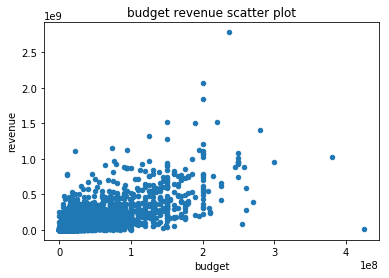

In [21]:
# draw scatter plot between budget and revenue to visula exploratory data analysis  
df_copy.plot(kind = "scatter",x="budget",y = "revenue")
plt.xlabel('budget')              
plt.ylabel('revenue')
plt.title('budget revenue scatter plot') 
plt.show()

#### as shown in graph as budget increases revenue increases 

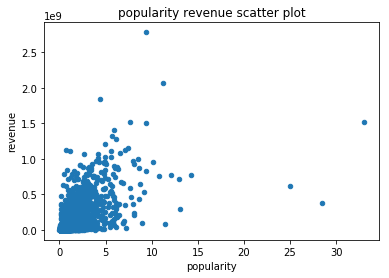

In [22]:
# draw scatter plot between popularity and revenue 
df_copy.plot(kind = "scatter",x="popularity",y = "revenue")
plt.xlabel('popularity')              
plt.ylabel('revenue')
plt.title('popularity revenue scatter plot') 
plt.show()

#### as shown in graph as popularity increases revenue increases 

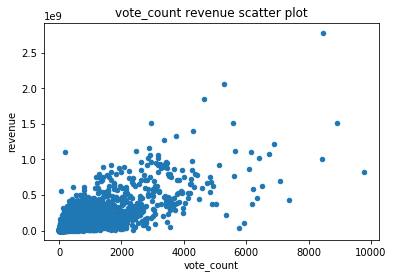

In [20]:
# draw scatter plot between vote_count and revenue 
df_copy.plot(kind = "scatter",x="vote_count",y = "revenue")
plt.xlabel('vote_count')              
plt.ylabel('revenue')
plt.title('vote_count revenue scatter plot') 
plt.show()

#### as shown in graph as vote_count increases revenue increases 

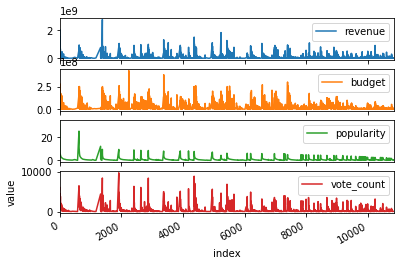

In [18]:
# draw the values of revenue, budget, popularity and vote_count for each movie
data1 = df_copy.loc[:,["revenue","budget","popularity","vote_count"]]
data1.plot(subplots = True)
plt.xlabel('index')              
plt.ylabel('value')
plt.show()

### Research Question 2  (Which genres have top revenue?)

In [56]:
# display frequency of genres
print(df_copy['genres'].value_counts(dropna =False))

Drama                                                245
Comedy                                               233
Drama|Romance                                        107
Comedy|Romance                                       104
Comedy|Drama|Romance                                  91
Comedy|Drama                                          88
Horror|Thriller                                       81
Horror                                                58
Drama|Thriller                                        48
Action|Thriller                                       39
Crime|Drama|Thriller                                  37
Drama|Comedy                                          36
Comedy|Family                                         32
Action|Crime|Thriller                                 31
Drama|History                                         28
Drama|Crime                                           27
Crime|Drama                                           26
Drama|Comedy|Romance           

In [24]:
# display the top 100 movie's revenue
top_100_revenue = df_copy.sort_values('revenue', ascending=False).head(100)
top_100_revenue[['revenue', 'genres']]

,revenue,genres
1386,2781505847,Action|Adventure|Fantasy|Science Fiction
3,2068178225,Action|Adventure|Science Fiction|Fantasy
5231,1845034188,Drama|Romance|Thriller
4361,1519557910,Science Fiction|Action|Adventure
0,1513528810,Action|Adventure|Science Fiction|Thriller
4,1506249360,Action|Crime|Thriller
14,1405035767,Action|Adventure|Science Fiction
3374,1327817822,Adventure|Family|Fantasy
5422,1274219009,Animation|Adventure|Family
5425,1215439994,Action|Adventure|Science Fiction


In [25]:
# inspect the frequency of genres of top 100 revenue
top_100_revenue.genres.value_counts()

Adventure|Fantasy|Action                             7
Adventure|Fantasy|Family                             6
Action|Adventure|Science Fiction                     5
Animation|Family                                     5
Adventure|Action|Science Fiction                     4
Adventure|Fantasy|Drama|Romance                      3
Action|Adventure|Fantasy|Science Fiction             3
Action|Adventure|Fantasy                             3
Adventure|Fantasy                                    2
Adventure|Family|Fantasy                             2
Science Fiction|Action|Adventure                     2
Action|Science Fiction|Adventure                     2
Fantasy|Action                                       2
Action|Thriller|Crime                                2
Animation|Comedy|Family|Adventure                    2
Fantasy|Adventure|Animation|Comedy|Family            1
Adventure|Animation|Comedy|Family|Fantasy            1
Drama|Romance|Thriller                               1
Adventure|

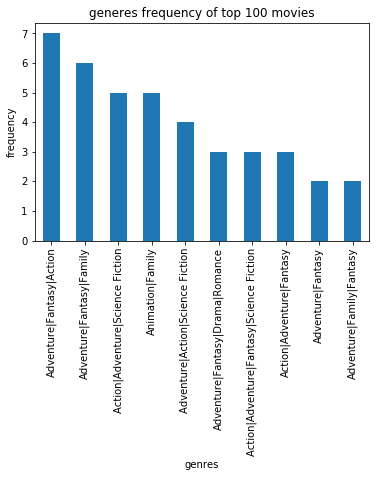

In [26]:
top_100_revenue.genres.value_counts().head(10).plot(kind='bar')
plt.xlabel('genres')              
plt.ylabel('frequency')
plt.title('generes frequency of top 100 movies')
plt.show()

#### from exploratory and plotting between top 100 movie's revenue and genres of them shown that Adventure, Fantasy and Action has most frequency of these top movies

In [28]:
# inspect the mean of revenue of each genre
top_genre_mean = df_copy.groupby(['genres']).revenue.mean().sort_values(ascending=False)
top_genre_mean 

genres
Action|Adventure|Science Fiction|Fantasy             2.068178e+09
Crime|Drama|Mystery|Thriller|Action                  1.106280e+09
Family|Fantasy|Adventure                             1.025467e+09
Adventure|Fantasy|Family|Mystery                     9.382127e+08
Science Fiction|Thriller|Action|Adventure            8.474235e+08
Action|Thriller|Science Fiction|Mystery|Adventure    8.255000e+08
Science Fiction|Adventure|Family|Fantasy             7.929106e+08
Family|Animation|Drama                               7.882418e+08
Fantasy|Adventure|Action|Family|Romance              7.584104e+08
Comedy|Adventure|Fantasy|Animation|Family            7.526009e+08
Science Fiction|Adventure|Thriller                   7.521002e+08
Science Fiction|Thriller|Drama                       7.163927e+08
Adventure|Fantasy|Romance                            7.121719e+08
Action|Adventure|Fantasy|Science Fiction             7.040630e+08
Science Fiction|Adventure|Fantasy                    6.912107e+08
Ani

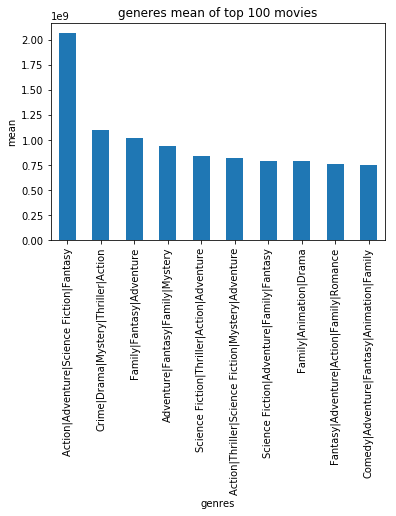

In [29]:
top_genre_mean.head(10).plot(kind='bar')
plt.xlabel('genres')              
plt.ylabel('mean')
plt.title('generes mean of top 100 movies')
plt.show()

#### from exploratory and plotting between each genre and revenue mean shown that genres of Action, Adventure, Science, Fiction, and Fantasy has top revenue mean

### Research Question 3  (Which directors, cast, production_copmanies contribute in top 100 movies revenue?)

In [30]:
# inspect the frequency of directors of top 100 revenue
top_100_revenue.director.value_counts()

Peter Jackson                                6
Christopher Nolan                            4
David Yates                                  4
George Lucas                                 4
Gore Verbinski                               3
Steven Spielberg                             3
Francis Lawrence                             3
Sam Raimi                                    3
Michael Bay                                  3
Joss Whedon                                  2
Marc Webb                                    2
Roland Emmerich                              2
Brad Bird                                    2
Sam Mendes                                   2
Bill Condon                                  2
Justin Lin                                   2
Chris Columbus                               2
Carlos Saldanha                              2
Alfonso CuarÃ³n                              2
James Cameron                                2
Eric Darnell|Tom McGrath|Conrad Vernon       1
Chris Miller|

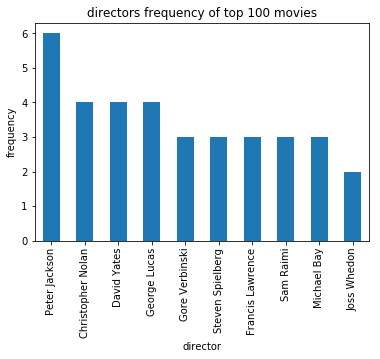

In [31]:
top_100_revenue.director.value_counts().head(10).plot(kind='bar')
plt.xlabel('director')              
plt.ylabel('frequency')
plt.title('directors frequency of top 100 movies')
plt.show()

#### it shown that 'Peter Jackson' directed 6 of top 100 movies 

In [63]:
# inspect the frequency of production_companies of top 100 revenue
top_100_revenue.production_companies.value_counts()

Walt Disney Pictures|Pixar Animation Studios                                                                  5
DreamWorks Animation                                                                                          5
Marvel Studios                                                                                                4
Lionsgate|Color Force                                                                                         3
Lucasfilm                                                                                                     3
Blue Sky Studios|Twentieth Century Fox Animation                                                              3
WingNut Films|New Line Cinema|The Saul Zaentz Company                                                         2
Walt Disney Pictures|Jerry Bruckheimer Films|Second Mate Productions                                          2
Warner Bros.|Heyday Films                                                                               

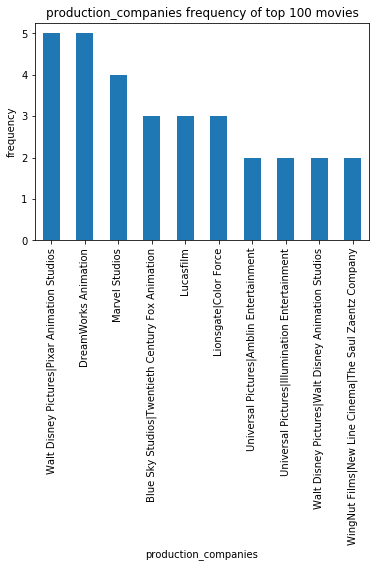

In [32]:
top_100_revenue.production_companies.value_counts().head(10).plot(kind='bar')
plt.xlabel('production_companies')              
plt.ylabel('frequency')
plt.title('production_companies frequency of top 100 movies')
plt.show()

#### it shown that 'DreamWorks Animation', 'Walt Disney Pictures', 'Pixar Animation Studios' produced 5 of top 100 movies

In [34]:
# inspect the frequency of cast of top 100 revenue
top_100_revenue.cast.value_counts()

Jennifer Lawrence|Josh Hutcherson|Liam Hemsworth|Woody Harrelson|Elizabeth Banks    3
Elijah Wood|Ian McKellen|Viggo Mortensen|Liv Tyler|Orlando Bloom                    3
Kristen Stewart|Robert Pattinson|Taylor Lautner|Ashley Greene|Peter Facinelli       2
Martin Freeman|Ian McKellen|Richard Armitage|Ken Stott|Graham McTavish              2
Mike Myers|Eddie Murphy|Cameron Diaz|Julie Andrews|Antonio Banderas                 2
Ewan McGregor|Natalie Portman|Hayden Christensen|Ian McDiarmid|Samuel L. Jackson    2
Scott Adsit|Ryan Potter|Daniel Henney|T.J. Miller|Jamie Chung                       1
Will Smith|Bill Pullman|Jeff Goldblum|Mary McDonnell|Judd Hirsch                    1
Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson         1
Craig T. Nelson|Holly Hunter|Samuel L. Jackson|Jason Lee|Dominique Louis            1
Harrison Ford|Cate Blanchett|Shia LaBeouf|Ray Winstone|Karen Allen                  1
Ed Asner|Christopher Plummer|Jordan Nagai|Bob Peterson

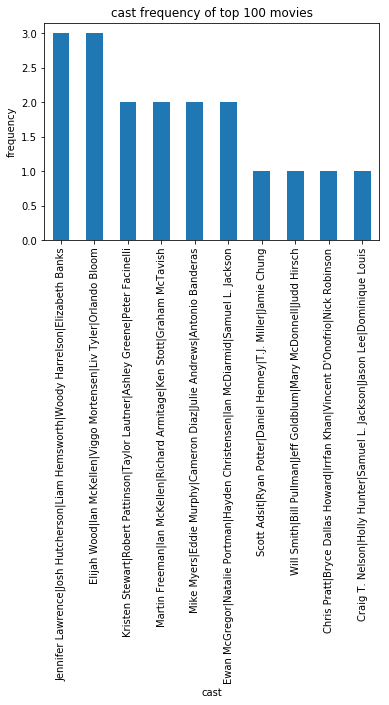

In [35]:
top_100_revenue.cast.value_counts().head(10).plot(kind='bar')
plt.xlabel('cast')              
plt.ylabel('frequency')
plt.title('cast frequency of top 100 movies')
plt.show()

#### it shown that casts that have 'Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Woody Harrelson, Elizabeth Banks' and 'Elijah Wood, Ian McKellen, Viggo Mortensen, Liv Tyler, Orlando Bloom' contributed in 3 of 100 top bovies

<a id='conclusions'></a>
## Conclusions

### limitiations
##### - more than 50% of movies have zoro budget so we dropped it from dataset  to not lead to wrong analysis 
##### - more than 50% of movies have zoro revenue so we dropped it from dataset  to not lead to wrong analysis 

### Results
##### - as budget increases revenue increases
##### - as popularity increases revenue increases
##### - as vote_count increases revenue increases
##### -  genres of  Adventure, Fantasy and Action has most frequency of  top 100 movies
##### - genres of Action, Adventure, Science, Fiction, and Fantasy has top revenue mean
##### - 'Peter Jackson' directed 6 of top 100 movies
##### - each of 'DreamWorks Animation', 'Walt Disney Pictures', 'Pixar Animation Studios' produced 5 of top 100 movies
##### -  each cast of 'Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Woody Harrelson, Elizabeth Banks' and 'Elijah Wood, Ian McKellen, Viggo Mortensen, Liv Tyler, Orlando Bloom' contributed in 3 of 100 top bovies